<a href="https://colab.research.google.com/github/roldanpau/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor flow development

In [10]:
# mlp for binary classification
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot
import tensorflow as tf

pd.set_option('display.max_columns', None) # Display all columns of dataframes

In [11]:
# PARAMETERS
num_epochs = 500
val_size = 100    # size of validation set

In [12]:
# Download dataset
TITANIC_TRAIN = "https://raw.githubusercontent.com/borjagomez/TF-Titanic/master/data/train.csv"
TITANIC_TEST = "https://raw.githubusercontent.com/borjagomez/TF-Titanic/master/data/test.csv"

train_data = pd.read_csv(TITANIC_TRAIN)
test_data = pd.read_csv(TITANIC_TEST)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
y = train_data["Survived"]

# Use only these features, converting categorical variables (such as "Sex" and 
# "Embarked") into indicator (or "dummy") variables
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# To scale X and X_test homogeneously, we concat them in a single dataframe, X2.
X2 = pd.concat([X, X_test])

# Show which columns have unknown values
print(X2.isna().sum())

# We have NaN values in Age and Fare. We substitute them by the average
X2["Age"] = X2.Age.fillna(X2.Age.mean())
X2["Fare"] = X2.Fare.fillna(X2.Fare.mean())

print(X2.head())

scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)
#print(X2.head())

print(X.shape[0])

X = X2.iloc[:X.shape[0], :]
X_test = X2.iloc[X.shape[0]:, :]
#print(X.head())
#print(X.tail())
#print(X_test.head())
#print(X_test.tail())

Pclass          0
Age           263
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64
   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
891


In [14]:
print(X)
print(X_test)
print(y)

       Pclass       Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
0    0.841916 -0.611972  0.481288 -0.445000 -0.503595   -0.743497  0.743497   
1   -1.546098  0.630431  0.481288 -0.445000  0.734503    1.344995 -1.344995   
2    0.841916 -0.301371 -0.479087 -0.445000 -0.490544    1.344995 -1.344995   
3   -1.546098  0.397481  0.481288 -0.445000  0.382925    1.344995 -1.344995   
4    0.841916  0.397481 -0.479087 -0.445000 -0.488127   -0.743497  0.743497   
..        ...       ...       ...       ...       ...         ...       ...   
886 -0.352091 -0.223721 -0.479087 -0.445000 -0.392417   -0.743497  0.743497   
887 -1.546098 -0.844922 -0.479087 -0.445000 -0.063719    1.344995 -1.344995   
888  0.841916  0.000000  0.481288  1.866526 -0.190364    1.344995 -1.344995   
889 -1.546098 -0.301371 -0.479087 -0.445000 -0.063719   -0.743497  0.743497   
890  0.841916  0.164530 -0.479087 -0.445000 -0.493927   -0.743497  0.743497   

     Embarked_C  Embarked_Q  Embarked_S  
0      -0

To evaluate how well the trained model performs on unseen data, we further split the dataset into separate training and test datasets.

In [15]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
#                                                          random_state=1, 
#                                                          stratify=y)

# Reserve 100 samples for validation
X_val = X[-val_size:]
y_val = y[-val_size:]
X_train = X[:-val_size]
y_train = y[:-val_size]

print(X_train)
print(y_train)

       Pclass       Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
0    0.841916 -0.611972  0.481288 -0.445000 -0.503595   -0.743497  0.743497   
1   -1.546098  0.630431  0.481288 -0.445000  0.734503    1.344995 -1.344995   
2    0.841916 -0.301371 -0.479087 -0.445000 -0.490544    1.344995 -1.344995   
3   -1.546098  0.397481  0.481288 -0.445000  0.382925    1.344995 -1.344995   
4    0.841916  0.397481 -0.479087 -0.445000 -0.488127   -0.743497  0.743497   
..        ...       ...       ...       ...       ...         ...       ...   
786  0.841916 -0.922572 -0.479087 -0.445000 -0.498842    1.344995 -1.344995   
787  0.841916 -1.699074  3.362411  0.710763 -0.080637   -0.743497  0.743497   
788  0.841916 -2.242625  0.481288  1.866526 -0.245953   -0.743497  0.743497   
789 -1.546098  1.251632 -0.479087 -0.445000  0.887574   -0.743497  0.743497   
790  0.841916  0.000000 -0.479087 -0.445000 -0.493927   -0.743497  0.743497   

     Embarked_C  Embarked_Q  Embarked_S  
0      -0

Number of features:  10


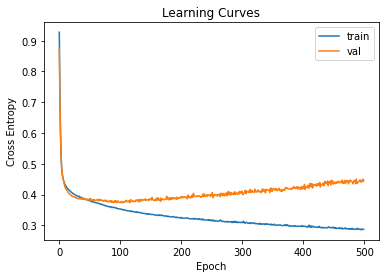

Accuracy on validation data:
0.8798988461494446


In [16]:
# determine the number of input features
n_features = X_train.shape[1]
print("Number of features: ", n_features)

# define model
model = Sequential()
model.add(Dense(2*n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(2*n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Configure the Adam optimization
Adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
# compile the model
model.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=num_epochs, 
                    batch_size=32, 
                    verbose=0, 
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(X_val, y_val))

# We defenitely have a problem of variance or overfitting. We should regularize.
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# PRG: This seems to refer to accuracy ON THE LAST BATCH of validation data 
# (i.e. only on one batch of examples of size batch_size=32).
# (See https://stackoverflow.com/questions/56447493/keras-model-fit-with-validation-data-which-batch-size-is-used-to-evaluate-the)
print("Accuracy on validation data:")
print(history.history['accuracy'][num_epochs-1])

# Next steps
# 1. Regularization
# 2. Add Cabin, Ticket or even Name attributes to the dataset


Evaluate the model on the ENTIRE validation set

In [17]:
results = model.evaluate(X_val, y_val, batch_size=val_size)
#print("test loss, test acc:", results)

1/1 [==============================] - 0s 102ms/step - loss: 0.4436 - accuracy: 0.8500


Evaluate the model on the test data

In [18]:
# Generate predictions for the passengers in test.csv
predictions = np.rint(model.predict(X_test).flatten()).astype(int)

#print(predictions)
#print(test_data.PassengerId)

# Save these new predictions in a CSV file my_submission.csv.
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
